In [ ]:
text=""" 경마장에 있는 말이 뛰고 있다.\n 
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다"""


- 토큰화

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

t= Tokenizer()

# 문장 분석 
t.fit_on_texts([text])

# 분석된 단어의 목록을 확인
t.word_docs

defaultdict(int,
            {'고와야': 1,
             '있는': 1,
             '곱다': 1,
             '있다': 1,
             '말이': 1,
             '뛰고': 1,
             '경마장에': 1,
             '법이다': 1,
             '그의': 1,
             '오는': 1,
             '가는': 1})

In [ ]:
# 단어의 수를 저장
vocab_size=len(t.word_docs)+1

vocab_size

12

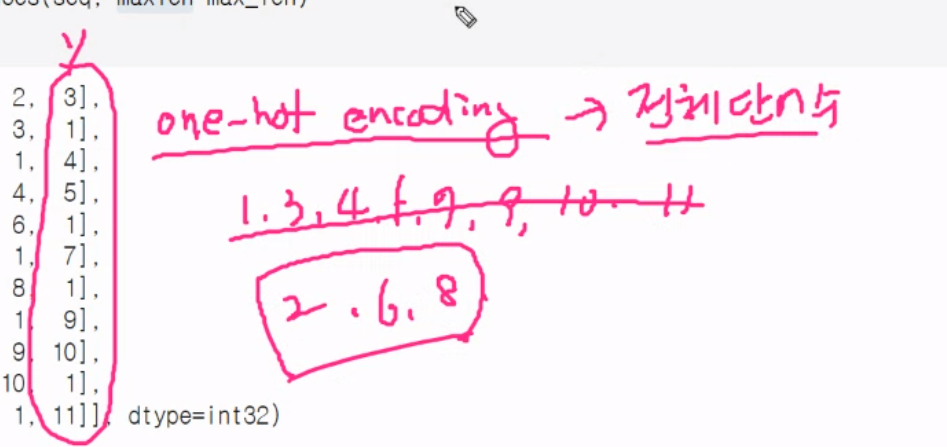

- 정수 인코딩


In [ ]:
seq=[]

# 문장을 한줄씩 읽어온다. 
for line in text.split("\n"):
  encoded=t.texts_to_sequences([line])[0]

  # 조합 가능한 단어 조합을 생성 
  for i in range(1,len(encoded)):
    s= encoded[:i+1]
    seq.append(s)

seq
# 경마장에 있는 말이 뛰고 있다.
#       경마장에 있는 
#       경마장에 있는 말이 
#       경마장에 있는 말이 뛰고
#       경마장에 있느 말이 뛰고 있다. 
#그의 말이 법이다
#       그의 말이
#       그의 말이 법이다.
# 가는 말이 고와야 오는 말이 곱다
#       가는 말이
#       가는 말이 고와야
#       가는 말이 고와야 오는
#       가는 말이 고와야 오는 말이 
#       가는 말이 고와야 오는 말이 곱다, 

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

- 인코딩된 결과를 같은 길이로 만듬 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 최대 길이의 문자의 단어수 
max_len=6

sequence=pad_sequences(seq, maxlen=max_len)
sequence

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]], dtype=int32)

- 특성데이터와 라벨 데이터로 분리 

In [ ]:
X= sequence[:, :-1]
y=sequence[:,-1]

X.shape, y.shape

((11, 5), (11,))

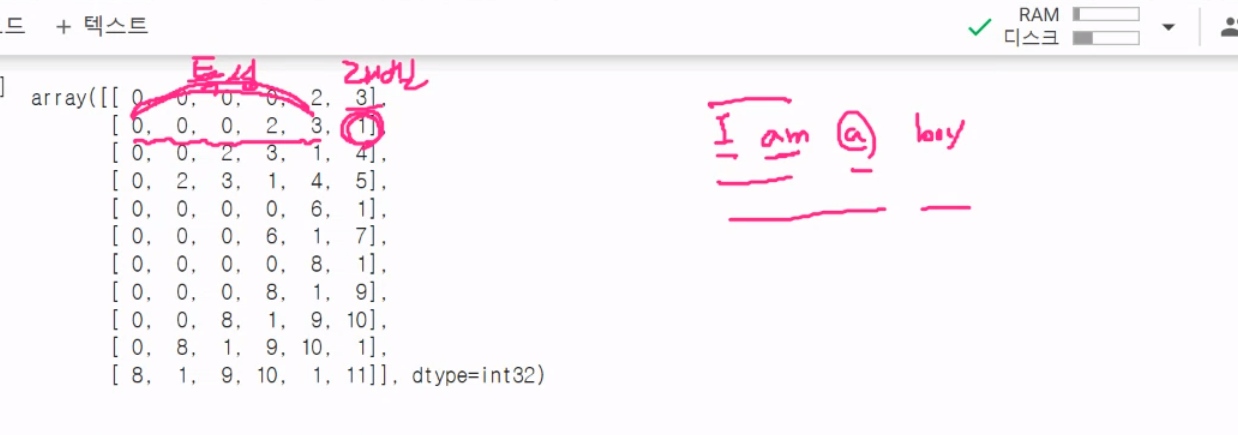

In [ ]:
#  데이터 값을 다진 분류해야 하는 것이니까 원핫 인코딩을 해보자 

- y를 원핫인코딩

In [ ]:
# 값이 수치 형태의 데이터인 경우에만 원핫인코딩
from tensorflow.keras.utils import to_categorical

y_en=to_categorical(y, num_classes=vocab_size)

y_en

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_en.shape

(11, 12)

- 신경망 설계


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model1=Sequential()

model1.add(Embedding(vocab_size,10, input_length=max_len-1))

model1.add(SimpleRNN(32))

model1.add(Dense(12, activation="softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 10)             120       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1376      
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


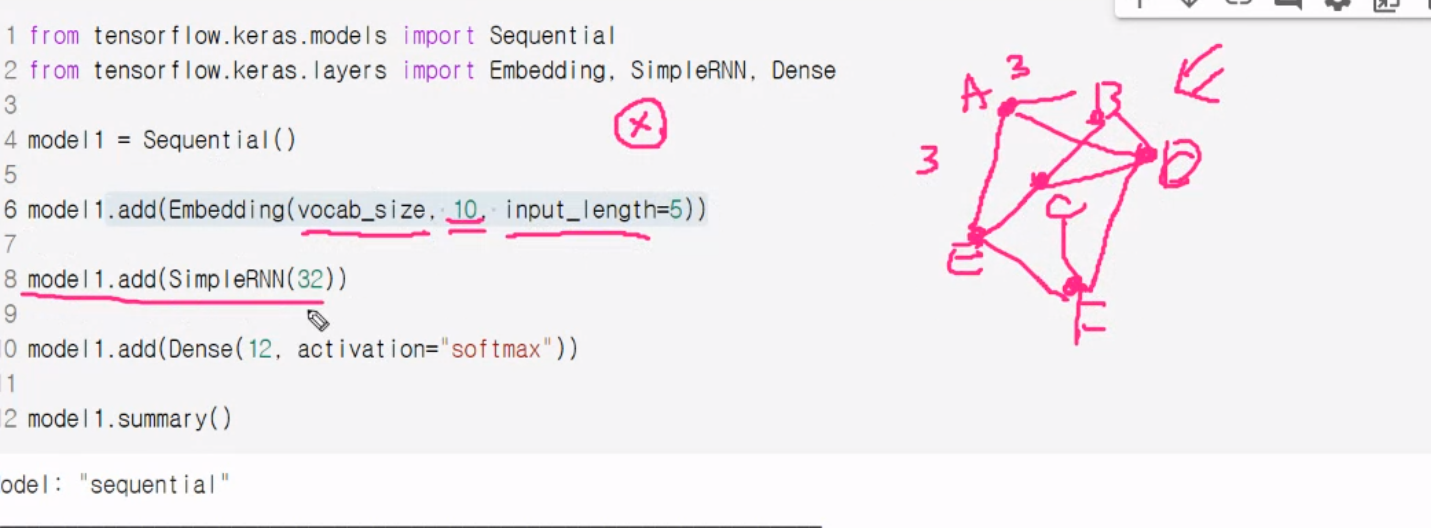

In [ ]:
model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
h1=model1.fit(X,y_en,epochs=200)

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 2.4949 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 2.4815 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 2.4682 - accuracy: 0.1818
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 2.4552 - accuracy: 0.3636
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 2.4421 - accuracy: 0.4545
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 2.4289 - accuracy: 0.4545
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 2.4155 - accuracy: 0.4545
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 2.4017 - accuracy: 0.4545
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 2.3873 - accuracy: 0.4545
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 2.3725 - accuracy: 0.4545
Epoch 11/200
1/1 [==

- 문장을 생성하는 함수

In [ ]:
import numpy as np

In [ ]:
# model: 사용한 모델 
# t:  사용한 Tokenizer
# word: 입력단어
#n:  입력단어로 부터 예측할 단어수 

def  generate_seqence(model, t, current_word,n):
  init_word=current_word # 입력된 단어로 시작해야 하므로 입력 단어를 먼저 저장 

  # 생성한 문장을 저장할 변수 초기화 
  seq=""

  for _ in range(n):

    # 현재 단어를 인코딩하고 padding 처리를 수행 
    encoded= t.texts_to_sequences([current_word])[0]
    encoded=pad_sequences([encoded], maxlen=max_len-1)

    # 현재 단어로 다음 단어를 예측
    result= np.argmax(model.predict(encoded))

    #print(result)
    for  word, index in t.word_index.items():
    # 예측한 단어와 동일한 인덱스의 단어가 있다면 종료
      if index== result:
        break

    #현재 단어와 예측한 단어를 연결
    current_word=current_word+" "+ word

    seq=seq+" "+current_word
    seq=init_word+seq

  seq= init_word+" "+seq

  return seq


In [ ]:
import numpy as np
# model : 사용한 모델
# t : 사용한 Tonkenizer
# word : 입력단어
# n : 입력단어로부터 예측할 단어 수
def generate_seqence(model, t, current_word, n) :
  init_word = current_word  # 입력된 단어로 시작해야 하므로 입력단어를 먼저 저장
  # 생성한 문장을 저장할 변수 초기화
  seq = ""
  for _ in range(n) :
    # 현재 단어를 인코딩하고 padding 처리를 수행
    encoded = t.texts_to_sequences([current_word])[0]
    encoded = pad_sequences([encoded], maxlen=max_len-1)
    # 현재 단어로 다음 단어를 예측 (인덱스 반환)
    result = np.argmax(model.predict(encoded))
    #print(result)
    for word, index in t.word_index.items() :
      # 예측한 단어와 동일한 인덱스의 단어가 있다면 종료
      if index == result :
        break
    # 현재단어와 예측한 단어를 연결
    current_word = current_word + " " + word
    seq = seq + " " + word
  seq = init_word + seq
  return seq

In [ ]:
generate_seqence(model1, t, "오는 ",4)

1/1 [==============================] - 0s 17ms/step


'오는  말이 법이다 있는 말이'

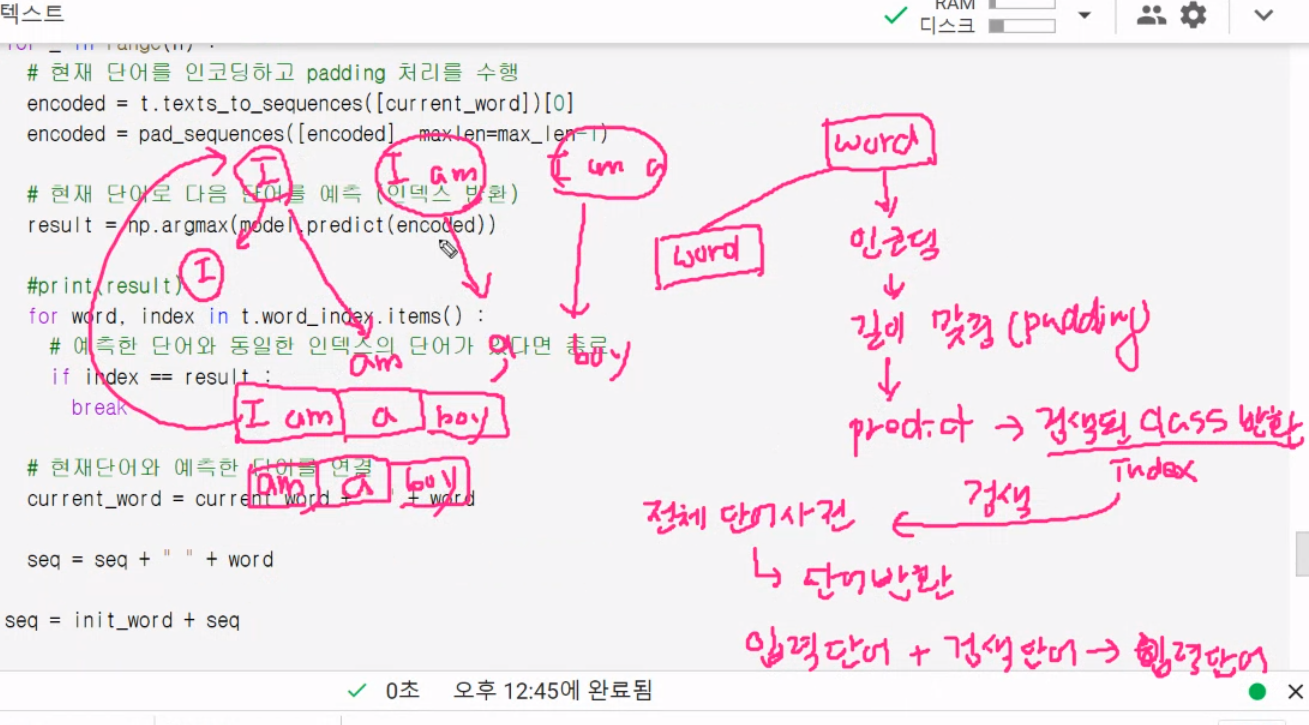

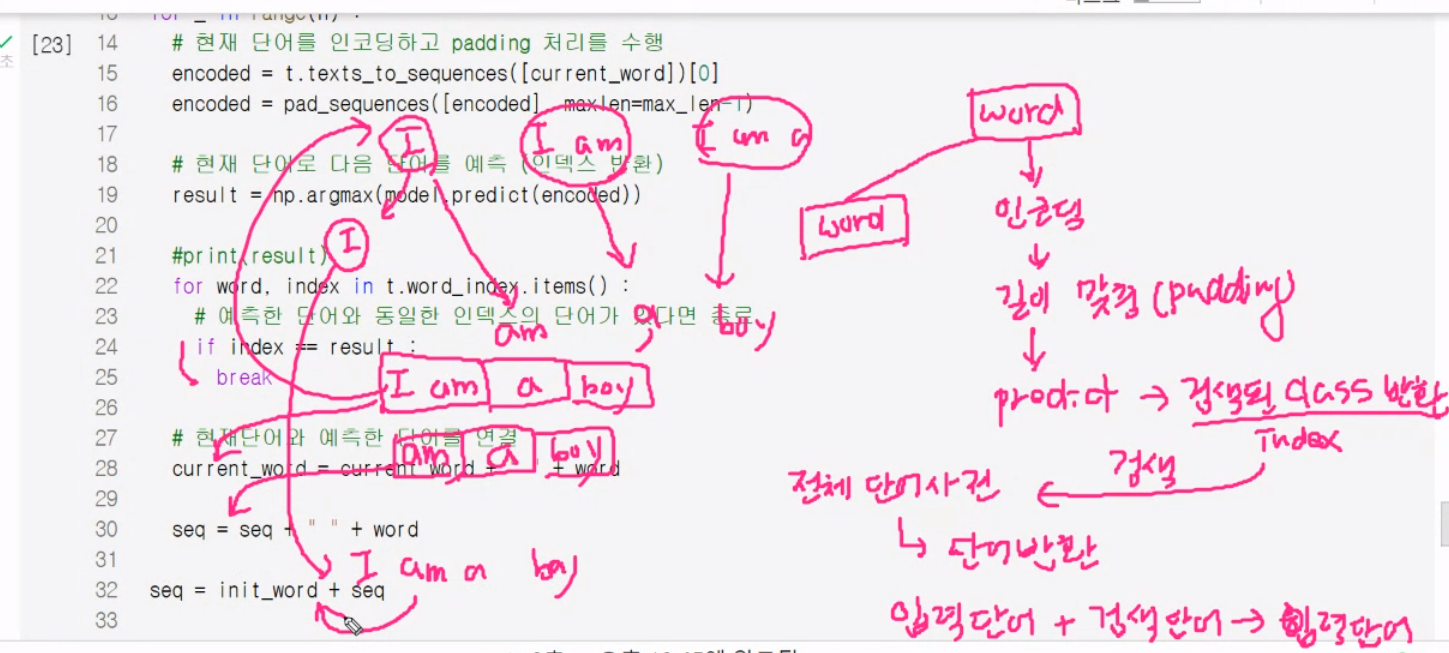

# 실제 기사들을 이용하여 문장생성하기 

- 빅카인즈: 에서 " 원하는 키워드"로 검색

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 4.7 MB/s 
     |████████████████████████████████| 453 kB 75.1 MB/s 


In [3]:
# 기사 읽기

import pandas as pd

file_dir=""

news=pd.read_excel("/content/drive/MyDrive/인공지능 사관학교/딥러닝/사물지능 딥러닝/data/NewsResult_20220727-20221027.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


- 형태소 분리 및 불용어 처리 


In [4]:
from konlpy.tag import Okt

okt=Okt()

# 제목, 본문 컬럼

# 제목 컬럼에서 한글, 숫자, 빈공만 추출
news["제목"]=news["제목"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [5]:
headlines=[]

stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와', '등', '으로도']

# 제목을 하나씩 읽어와서 형태소 분리를 하고 불용어 제거
for sentence in news["제목"] :
  temp=[]
  # 형태소 분리, 어간 추출
  temp=okt.morphs(sentence, stem=True)

  # 불용어 처리
  temp=[word for word in temp if not word in stopwords]
  headlines.append(temp)

In [6]:
headlines[:5]

[['대장동', '특검', '론', '이재명', '셀프', '방탄', '완결', '판', '개', '인', '살리다', '제물', '로'],
 ['사찰', '일', '주문', '8', '건', '보물', '지정', '예고'],
 ['심심하다', '호찌민', '옆', '바닷가', '숨다', '보석', '호짬', '열리다'],
 ['젠', '국회', '에서도', '인공', '지능', '로봇', '큐', '아', '만난', '다'],
 ['위기', '공', '영', '방송', '수술대', '오르다', '수신료', '삭감', '하']]

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_feature=5000

t=Tokenizer(num_words=max_feature)
# 빈도수 분석 -> 정렬 -> 순서대로 인덱스 부여 (1부터)

t.fit_on_texts(headlines)

#단어수 
vocab_size=len(t.word_index)+1

# 인코딩
headlines_en= t.texts_to_sequences(headlines)

headlines_en[:5]

[[3039, 1042, 1001, 13, 1979, 593, 64, 29, 685, 5],
 [2110, 47, 1604, 159, 773, 960, 309, 1125],
 [4024, 4544, 2801, 1085, 2802, 227],
 [834, 550, 1864, 1605, 1980, 835, 193, 2803, 20],
 [229, 19, 140, 1225, 724, 3040, 11]]

- 2 개 이상의 단어 조합으로 된 문장을 만들어 저장 


In [11]:
seqs=[]

for line in headlines_en :
  for i in range(1, len(line)):
    seq=line[:i+1]
    seqs.append(seq)

seqs[:10]

[[3039, 1042],
 [3039, 1042, 1001],
 [3039, 1042, 1001, 13],
 [3039, 1042, 1001, 13, 1979],
 [3039, 1042, 1001, 13, 1979, 593],
 [3039, 1042, 1001, 13, 1979, 593, 64],
 [3039, 1042, 1001, 13, 1979, 593, 64, 29],
 [3039, 1042, 1001, 13, 1979, 593, 64, 29, 685],
 [3039, 1042, 1001, 13, 1979, 593, 64, 29, 685, 5],
 [2110, 47]]

In [12]:
index_to_word={}
for word, key in t.word_index.items():
  index_to_word[key]=word

index_to_word[30]

'화'

In [13]:
# 문장의 최대 길이
max_len=max(len(s) for s in seqs)
max_len

22

- 같은 길이로 만들어줌 

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy.lib.arraypad import pad

seqs=pad_sequences(seqs, maxlen=max_len)

seqs[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 3039, 1042],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0, 3039, 1042, 1001],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 3039, 1042, 1001,   13],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 3039, 1042, 1001,   13, 1979],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 3039, 1042, 1001,   13, 1979,  593]],
      dtype=int32)

- 특성과 라벨 데이터로 분리


In [15]:
X=seqs[:, :-1]
y=seqs[:,-1]

X.shape,y.shape

((127941, 21), (127941,))

In [16]:
# 원핫 인코딩을 합시다. 

from tensorflow.keras.utils import to_categorical

y_en=to_categorical(y, num_classes=vocab_size)

y_en.shape

(127941, 25180)

- 신경망 설계

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model2=Sequential()

model2.add(Embedding(vocab_size,20, input_length=max_len-1))

model2.add(LSTM(128))

model2.add(Dense(vocab_size, activation="softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 21, 20)            503600    
                                                                 
 lstm_1 (LSTM)               (None, 128)               76288     
                                                                 
 dense_1 (Dense)             (None, 25180)             3248220   
                                                                 
Total params: 3,828,108
Trainable params: 3,828,108
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
h2=model2.fit(X,y_en, epochs=100)

InternalError: ignored

In [ ]:
model2.save("/content/drive/MyDrive/인공지능 사관학교/딥러닝/사물지능 딥러닝/model/best_news_model.h5")

In [24]:
from tensorflow.keras.models import load_model

best_model=load_model("/content/drive/MyDrive/인공지능 사관학교/딥러닝/사물지능 딥러닝/model/best_model_news.h5")

In [25]:
best_model.evaluate(X, y_en)

InternalError: ignored